<a href="https://colab.research.google.com/github/JorgeLJimenez/AB/blob/master/Tarea_Problema_de_los_tres_cuerpos_restringido.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Se presentan varias condiciones iniciales y/o configuraciones para visualizar algunas órbitas del problema de los tres cuerpos restringido

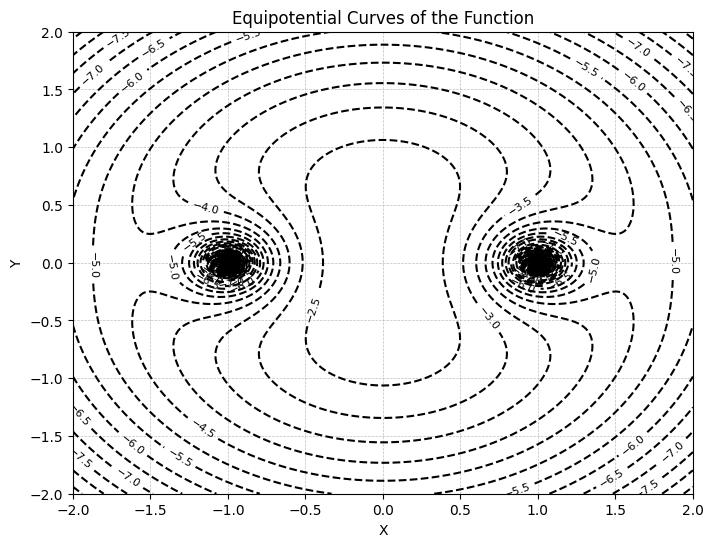

In [ ]:
'''Un intento de hallar los puntos lagrangianos por método gráfico.
Faltan dos puntos Lagragianos: el de arriba (L4) y el de abajo (L5)'''

import numpy as np
import matplotlib.pyplot as plt

# Define the function
def func(x, y):
    return -x**2 - y**2 - 1/np.sqrt((x + 1)**2 + y**2) - 1/np.sqrt((x - 1)**2 + y**2)

# Create a grid of x and y values
x = np.linspace(-2, 2, 500)
y = np.linspace(-2, 2, 500)
X, Y = np.meshgrid(x, y)

# Calculate the function values for the grid points
Z = func(X, Y)

# Create a contour plot for equipotential curves
plt.figure(figsize=(8, 6))
contour = plt.contour(X, Y, Z, levels=500, colors='black')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Equipotential Curves of the Function')
plt.clabel(contour, inline=True, fontsize=8)  # Add contour labels
plt.grid(True, linestyle='--', linewidth=0.5, color='gray', alpha=0.5)
plt.show()


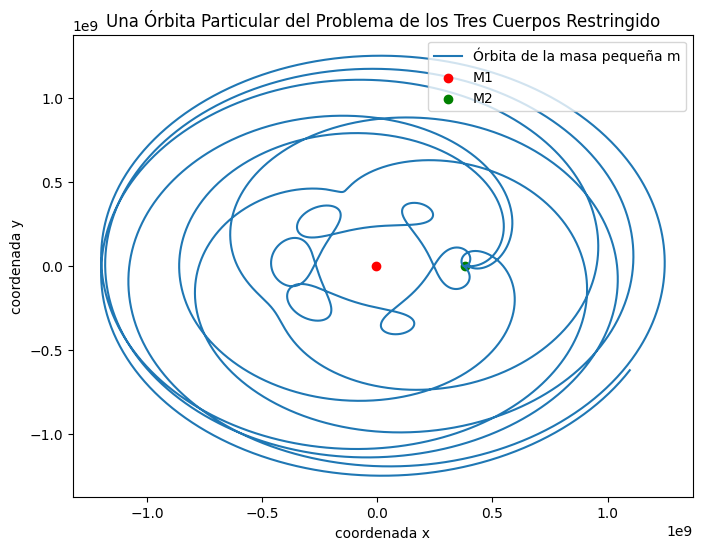

In [ ]:
'''En este código, se modela el sistema Tierra-Luna-masita '''

import numpy as np
import matplotlib.pyplot as plt
import math
from scipy.integrate import solve_ivp

# Define the restricted three-body problem equations
def restricted_three_body(t, u):
    x, y, vx, vy = u
    r1 = np.sqrt((x - x1)**2 + y**2)
    r2 = np.sqrt((x - x2)**2 + y**2)
    ax = - 2 * w * vy + w**2 * x - (G * M1 * (x - x1)) / r1**3 - (G * M2 * (x - x2))/ r2**3
    ay = 2 * w * vx + w**2 * y - (G * M1 * y)/ r1**3 - (G * M2 * y)/ r2**3
    return [vx, vy, ax, ay]

# Define some constants
G = 6.672e-11
tau = 2360591.424 # periodo de la órbita Tierra-Luna en segundos (son 27 días)
w = 2*math.pi / tau

# Define the masses of the larger bodies
M1 = 5.972e24  # Mass of the first larger body
M2 = 7.349e22   # Mass of the second larger body

# Define the positions of the larger bodies
x1 = - (M2 / (M1 + M2)**(2/3)) * (G / w**2)**(1/3)
x2 = (M1 / (M1 + M2)**(2/3)) * (G / w**2)**(1/3)

# Define the initial conditions (position and velocity) of the small mass
x0 = 4e8   # Initial x-coordinate of the small mass
y0 = 0.0   # Initial y-coordinate of the small mass
vx0 = -0.5e3  # Initial x-velocity of the small mass
vy0 = 1e2  # Initial y-velocity of the small mass

# Set the time span for the simulation
t_span = (0, 15*tau)
t_eval = np.linspace(t_span[0], t_span[1], 10000)

# Solve the initial value problem using solve_ivp
sol = solve_ivp(restricted_three_body, t_span, [x0, y0, vx0, vy0], t_eval=t_eval, method='RK45')

# Extract the solution components
x_values, y_values = sol.y[0], sol.y[1]

# Plot the orbit of the small mass in 2D space
plt.figure(figsize=(8, 6))
plt.plot(x_values, y_values, label='Órbita de la masa pequeña m')
plt.scatter([x1], [0], color='red', marker='o', label='M1')
plt.scatter([x2], [0], color='green', marker='o', label='M2')
plt.xlabel('coordenada x')
plt.ylabel('coordenada y')
plt.title('Una Órbita Particular del Problema de los Tres Cuerpos Restringido')
plt.legend()
plt.grid(False)
plt.show()

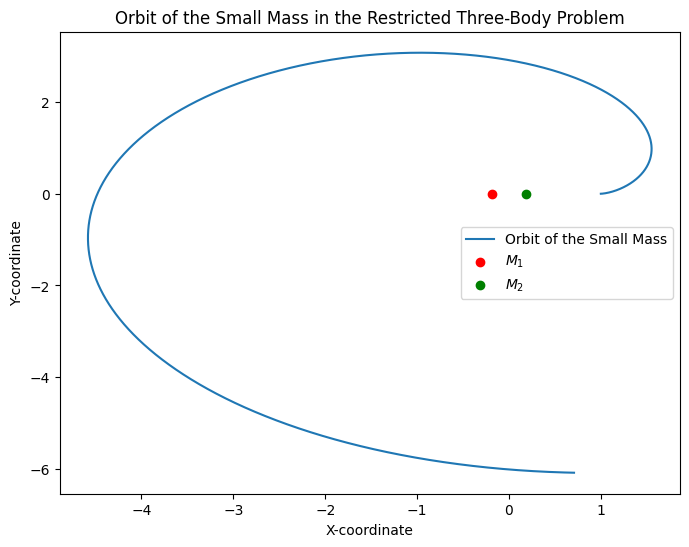

In [ ]:
'''En este código, se modela el sistema Tierra-Luna-masita '''

import numpy as np
import matplotlib.pyplot as plt
import math
from scipy.integrate import solve_ivp

# Define the restricted three-body problem equations
def restricted_three_body(t, u):
    x, y, vx, vy = u
    r1 = np.sqrt((x - x1)**2 + y**2)
    r2 = np.sqrt((x - x2)**2 + y**2)
    ax = - 2 * w * vy + w**2 * x - (G * M1 * (x - x1)) / r1**3 - (G * M2 * (x - x2))/ r2**3
    ay = 2 * w * vx + w**2 * y - (G * M1 * y)/ r1**3 - (G * M2 * y)/ r2**3
    return [vx, vy, ax, ay]

# Define some constants
G = 1
tau = 1 # periodo de la órbita Tierra-Luna en segundos
w = 2*math.pi / tau

# Define the masses of the larger bodies
M1 = 1  # Mass of the first larger body
M2 = 1   # Mass of the second larger body

# Define the positions of the larger bodies
x1 = - (M2 / (M1 + M2)**(2/3)) * (G / w**2)**(1/3)
x2 = (M1 / (M1 + M2)**(2/3)) * (G / w**2)**(1/3)

# Define the initial conditions (position and velocity) of the small mass
x0 = 1   # Initial x-coordinate of the small mass
y0 = 0.0   # Initial y-coordinate of the small mass
vx0 = 0.0  # Initial x-velocity of the small mass
vy0 = 0.0  # Initial y-velocity of the small mass

# Set the time span for the simulation
t_span = (0, 1*tau)
t_eval = np.linspace(t_span[0], t_span[1], 10000)

# Solve the initial value problem using solve_ivp
sol = solve_ivp(restricted_three_body, t_span, [x0, y0, vx0, vy0], t_eval=t_eval, method='RK45')

# Extract the solution components
x_values, y_values = sol.y[0], sol.y[1]

# Plot the orbit of the small mass in 2D space
plt.figure(figsize=(8, 6))
plt.plot(x_values, y_values, label='Orbit of the Small Mass')
plt.scatter([x1], [0], color='red', marker='o', label='$M_1$')
plt.scatter([x2], [0], color='green', marker='o', label='$M_2$')
plt.xlabel('X-coordinate')
plt.ylabel('Y-coordinate')
plt.title('Orbit of the Small Mass in the Restricted Three-Body Problem')
plt.legend()
plt.grid(False)
plt.show()

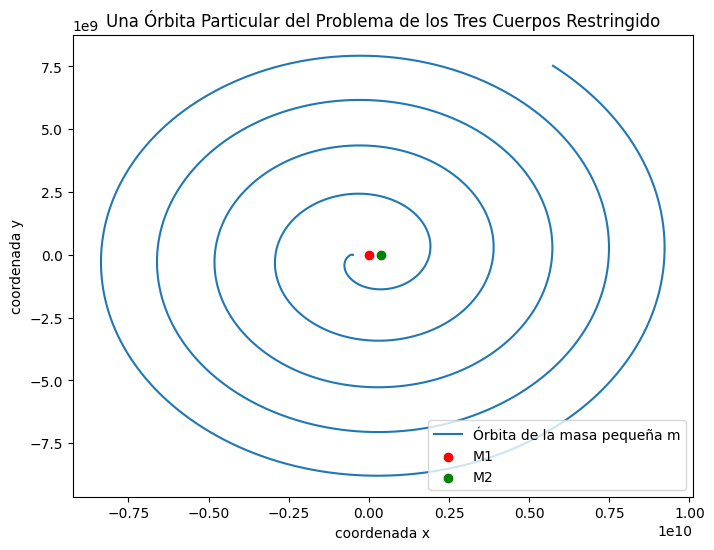

In [ ]:
'''En este código, se modela el sistema Tierra-Luna-masita '''

import numpy as np
import matplotlib.pyplot as plt
import math
from scipy.integrate import solve_ivp

# Define the restricted three-body problem equations
def restricted_three_body(t, u):
    x, y, vx, vy = u
    r1 = np.sqrt((x - x1)**2 + y**2)
    r2 = np.sqrt((x - x2)**2 + y**2)
    ax = - 2 * w * vy + w**2 * x - (G * M1 * (x - x1)) / r1**3 - (G * M2 * (x - x2))/ r2**3
    ay = 2 * w * vx + w**2 * y - (G * M1 * y)/ r1**3 - (G * M2 * y)/ r2**3
    return [vx, vy, ax, ay]

# Define some constants
G = 6.672e-11
tau = 2360591.424 # periodo de la órbita Tierra-Luna en segundos (son 27 días)
w = 2*math.pi / tau

# Define the masses of the larger bodies
M1 = 5.972e24  # Mass of the first larger body
M2 = 7.349e22   # Mass of the second larger body

# Define the positions of the larger bodies
x1 = - (M2 / (M1 + M2)**(2/3)) * (G / w**2)**(1/3)
x2 = (M1 / (M1 + M2)**(2/3)) * (G / w**2)**(1/3)

# Define the initial conditions (position and velocity) of the small mass
x0 = -5e8   # Initial x-coordinate of the small mass
y0 = 0.0   # Initial y-coordinate of the small mass
vx0 = 0.5e2  # Initial x-velocity of the small mass
vy0 = 1e2  # Initial y-velocity of the small mass

# Set the time span for the simulation
t_span = (0, 5*tau)
t_eval = np.linspace(t_span[0], t_span[1], 10000)

# Solve the initial value problem using solve_ivp
sol = solve_ivp(restricted_three_body, t_span, [x0, y0, vx0, vy0], t_eval=t_eval, method='RK45')

# Extract the solution components
x_values, y_values = sol.y[0], sol.y[1]

# Plot the orbit of the small mass in 2D space
plt.figure(figsize=(8, 6))
plt.plot(x_values, y_values, label='Órbita de la masa pequeña m')
plt.scatter([x1], [0], color='red', marker='o', label='M1')
plt.scatter([x2], [0], color='green', marker='o', label='M2')
plt.xlabel('coordenada x')
plt.ylabel('coordenada y')
plt.title('Una Órbita Particular del Problema de los Tres Cuerpos Restringido')
plt.legend()
plt.grid(False)
plt.show()

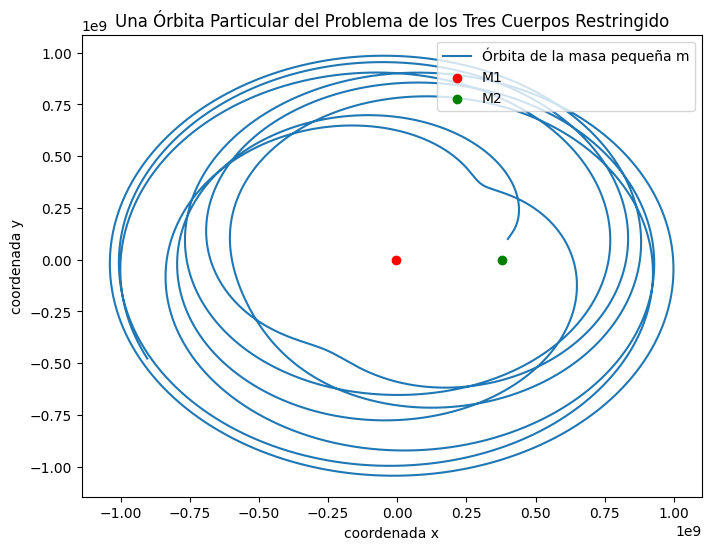

In [ ]:
'''En este código, se modela el sistema Tierra-Luna-masita '''

import numpy as np
import matplotlib.pyplot as plt
import math
from scipy.integrate import solve_ivp

# Define the restricted three-body problem equations
def restricted_three_body(t, u):
    x, y, vx, vy = u
    r1 = np.sqrt((x - x1)**2 + y**2)
    r2 = np.sqrt((x - x2)**2 + y**2)
    ax = - 2 * w * vy + w**2 * x - (G * M1 * (x - x1)) / r1**3 - (G * M2 * (x - x2))/ r2**3
    ay = 2 * w * vx + w**2 * y - (G * M1 * y)/ r1**3 - (G * M2 * y)/ r2**3
    return [vx, vy, ax, ay]

# Define some constants
G = 6.672e-11
tau = 2360591.424 # periodo de la órbita Tierra-Luna en segundos (son 27 días)
w = 2*math.pi / tau

# Define the masses of the larger bodies
M1 = 5.972e24  # Mass of the first larger body
M2 = 7.349e22   # Mass of the second larger body

# Define the positions of the larger bodies
x1 = - (M2 / (M1 + M2)**(2/3)) * (G / w**2)**(1/3)
x2 = (M1 / (M1 + M2)**(2/3)) * (G / w**2)**(1/3)

# Define the initial conditions (position and velocity) of the small mass
x0 = 4e8   # Initial x-coordinate of the small mass
y0 = 1e8   # Initial y-coordinate of the small mass
vx0 = 0.5e2  # Initial x-velocity of the small mass
vy0 = 1e2  # Initial y-velocity of the small mass

# Set the time span for the simulation
t_span = (0, 12*tau)
t_eval = np.linspace(t_span[0], t_span[1], 10000)

# Solve the initial value problem using solve_ivp
sol = solve_ivp(restricted_three_body, t_span, [x0, y0, vx0, vy0], t_eval=t_eval, method='RK45')

# Extract the solution components
x_values, y_values = sol.y[0], sol.y[1]

# Plot the orbit of the small mass in 2D space
plt.figure(figsize=(8, 6))
plt.plot(x_values, y_values, label='Órbita de la masa pequeña m')
plt.scatter([x1], [0], color='red', marker='o', label='M1')
plt.scatter([x2], [0], color='green', marker='o', label='M2')
plt.xlabel('coordenada x')
plt.ylabel('coordenada y')
plt.title('Una Órbita Particular del Problema de los Tres Cuerpos Restringido')
plt.legend(loc='upper right')
plt.grid(False)
plt.show()

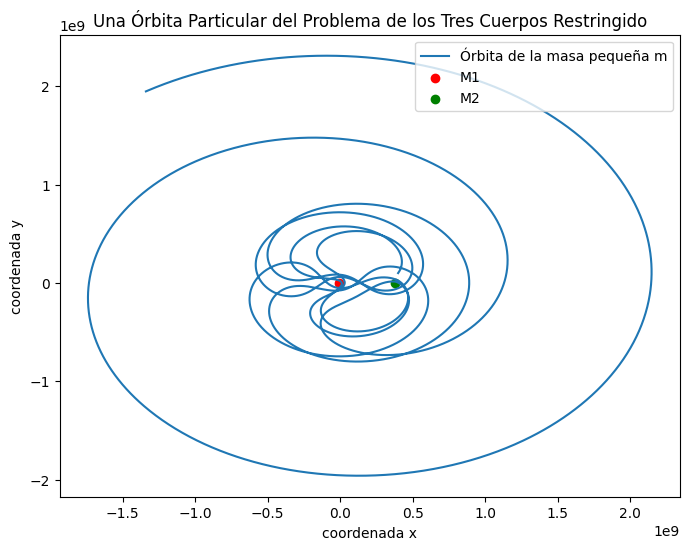

In [ ]:
'''En este código, se modela el sistema Tierra-Luna-masita '''

import numpy as np
import matplotlib.pyplot as plt
import math
from scipy.integrate import solve_ivp

# Define the restricted three-body problem equations
def restricted_three_body(t, u):
    x, y, vx, vy = u
    r1 = np.sqrt((x - x1)**2 + y**2)
    r2 = np.sqrt((x - x2)**2 + y**2)
    ax = - 2 * w * vy + w**2 * x - (G * M1 * (x - x1)) / r1**3 - (G * M2 * (x - x2))/ r2**3
    ay = 2 * w * vx + w**2 * y - (G * M1 * y)/ r1**3 - (G * M2 * y)/ r2**3
    return [vx, vy, ax, ay]

# Define some constants
G = 6.672e-11
tau = 2360591.424 # periodo de la órbita Tierra-Luna en segundos (son 27 días)
w = 2*math.pi / tau

# Define the masses of the larger bodies
M1 = 5.972e24  # Mass of the first larger body
M2 = 7.349e22   # Mass of the second larger body

# Define the positions of the larger bodies
x1 = - (M2 / (M1 + M2)**(2/3)) * (G / w**2)**(1/3)
x2 = (M1 / (M1 + M2)**(2/3)) * (G / w**2)**(1/3)

# Define the initial conditions (position and velocity) of the small mass
x0 = 4e8   # Initial x-coordinate of the small mass
y0 = 1e8   # Initial y-coordinate of the small mass
vx0 = 0.5e3  # Initial x-velocity of the small mass
vy0 = 1e3  # Initial y-velocity of the small mass

# Set the time span for the simulation
t_span = (0, 8*tau)
t_eval = np.linspace(t_span[0], t_span[1], 10000)

# Solve the initial value problem using solve_ivp
sol = solve_ivp(restricted_three_body, t_span, [x0, y0, vx0, vy0], t_eval=t_eval, method='RK45')

# Extract the solution components
x_values, y_values = sol.y[0], sol.y[1]

# Plot the orbit of the small mass in 2D space
plt.figure(figsize=(8, 6))
plt.plot(x_values, y_values, label='Órbita de la masa pequeña m')
plt.scatter([x1], [0], color='red', marker='o', label='M1')
plt.scatter([x2], [0], color='green', marker='o', label='M2')
plt.xlabel('coordenada x')
plt.ylabel('coordenada y')
plt.title('Una Órbita Particular del Problema de los Tres Cuerpos Restringido')
plt.legend(loc='upper right')
plt.grid(False)
plt.show()

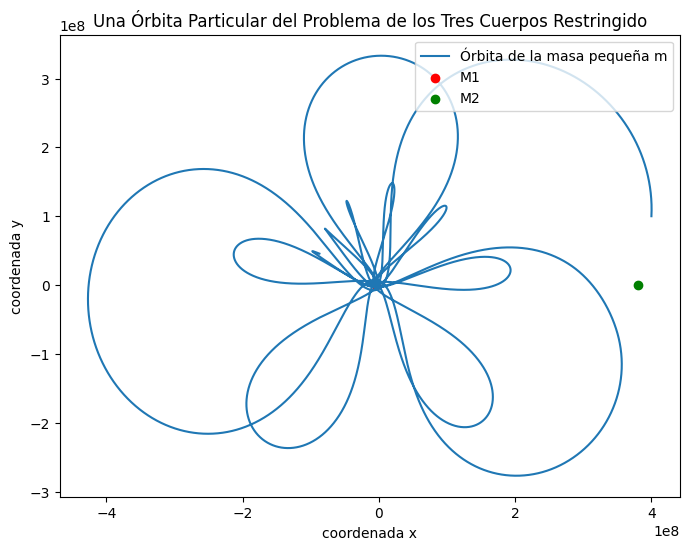

In [ ]:
'''En este código, se modela el sistema Tierra-Luna-masita '''

import numpy as np
import matplotlib.pyplot as plt
import math
from scipy.integrate import solve_ivp

# Define the restricted three-body problem equations
def restricted_three_body(t, u):
    x, y, vx, vy = u
    r1 = np.sqrt((x - x1)**2 + y**2)
    r2 = np.sqrt((x - x2)**2 + y**2)
    ax = - 2 * w * vy + w**2 * x - (G * M1 * (x - x1)) / r1**3 - (G * M2 * (x - x2))/ r2**3
    ay = 2 * w * vx + w**2 * y - (G * M1 * y)/ r1**3 - (G * M2 * y)/ r2**3
    return [vx, vy, ax, ay]

# Define some constants
G = 6.672e-11
tau = 2360591.424 # periodo de la órbita Tierra-Luna en segundos (son 27 días)
w = 2*math.pi / tau

# Define the masses of the larger bodies
M1 = 5.972e24  # Mass of the first larger body
M2 = 7.349e22   # Mass of the second larger body

# Define the positions of the larger bodies
x1 = - (M2 / (M1 + M2)**(2/3)) * (G / w**2)**(1/3)
x2 = (M1 / (M1 + M2)**(2/3)) * (G / w**2)**(1/3)

# Define the initial conditions (position and velocity) of the small mass
x0 = 4e8   # Initial x-coordinate of the small mass
y0 = 1e8   # Initial y-coordinate of the small mass
vx0 = 0.5e2  # Initial x-velocity of the small mass
vy0 = 1e3  # Initial y-velocity of the small mass

# Set the time span for the simulation
t_span = (0, 2.4*tau)
t_eval = np.linspace(t_span[0], t_span[1], 10000)

# Solve the initial value problem using solve_ivp
sol = solve_ivp(restricted_three_body, t_span, [x0, y0, vx0, vy0], t_eval=t_eval, method='RK45')

# Extract the solution components
x_values, y_values = sol.y[0], sol.y[1]

# Plot the orbit of the small mass in 2D space
plt.figure(figsize=(8, 6))
plt.plot(x_values, y_values, label='Órbita de la masa pequeña m')
plt.scatter([x1], [0], color='red', marker='o', label='M1')
plt.scatter([x2], [0], color='green', marker='o', label='M2')
plt.xlabel('coordenada x')
plt.ylabel('coordenada y')
plt.title('Una Órbita Particular del Problema de los Tres Cuerpos Restringido')
plt.legend(loc='upper right')
plt.grid(False)
plt.show()

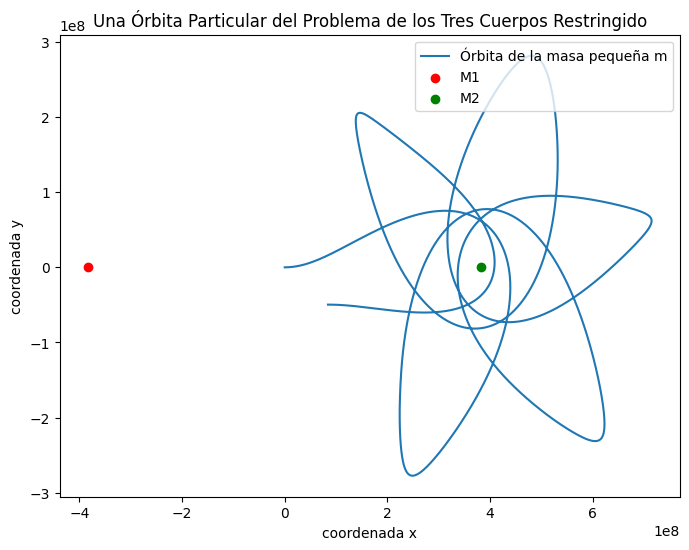

In [ ]:
'''En este código, se modela el sistema Tierra-Tierra-masita '''

import numpy as np
import matplotlib.pyplot as plt
import math
from scipy.integrate import solve_ivp

# Define the restricted three-body problem equations
def restricted_three_body(t, u):
    x, y, vx, vy = u
    r1 = np.sqrt((x - x1)**2 + y**2)
    r2 = np.sqrt((x - x2)**2 + y**2)
    ax = - 2 * w * vy + w**2 * x - (G * M1 * (x - x1)) / r1**3 - (G * M2 * (x - x2))/ r2**3
    ay = 2 * w * vx + w**2 * y - (G * M1 * y)/ r1**3 - (G * M2 * y)/ r2**3
    return [vx, vy, ax, ay]

# Define some constants
G = 6.672e-11
tau = 2*2360591.424 # El doble del periodo de la órbita Tierra-Luna en segundos (son 54 días)
w = 2*math.pi / tau

# Define the masses of the larger bodies
M1 = 5.972e24  # Mass of the first larger body
M2 = 5.972e24   # Mass of the second larger body

# Define the positions of the larger bodies
x1 = - (M2 / (M1 + M2)**(2/3)) * (G / w**2)**(1/3)
x2 = (M1 / (M1 + M2)**(2/3)) * (G / w**2)**(1/3)

# Define the initial conditions (position and velocity) of the small mass
x0 = 0.0   # Initial x-coordinate of the small mass
y0 = 0.0   # Initial y-coordinate of the small mass
vx0 = 0.5e3 # Initial x-velocity of the small mass
vy0 = 0.0  # Initial y-velocity of the small mass

# Set the time span for the simulation
t_span = (0, 1*tau)
t_eval = np.linspace(t_span[0], t_span[1], 10000)

# Solve the initial value problem using solve_ivp
sol = solve_ivp(restricted_three_body, t_span, [x0, y0, vx0, vy0], t_eval=t_eval, method='RK45')

# Extract the solution components
x_values, y_values = sol.y[0], sol.y[1]

# Plot the orbit of the small mass in 2D space
plt.figure(figsize=(8, 6))
plt.plot(x_values, y_values, label='Órbita de la masa pequeña m')
plt.scatter([x1], [0], color='red', marker='o', label='M1')
plt.scatter([x2], [0], color='green', marker='o', label='M2')
plt.xlabel('coordenada x')
plt.ylabel('coordenada y')
plt.title('Una Órbita Particular del Problema de los Tres Cuerpos Restringido')
plt.legend(loc='upper right')
plt.grid(False)
plt.show()

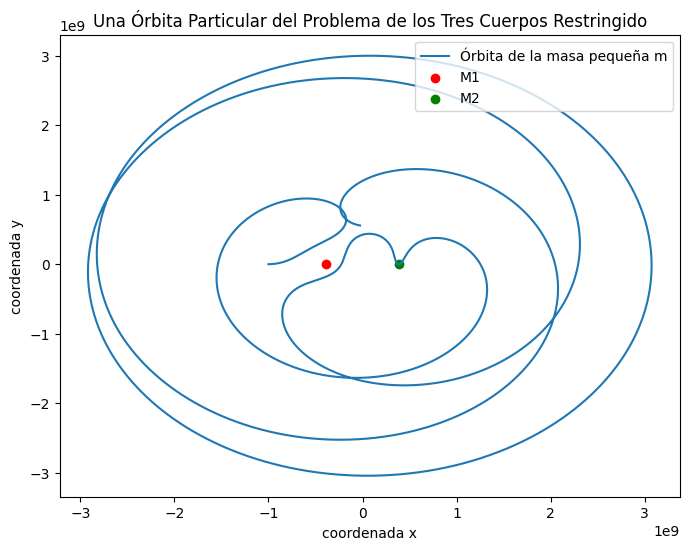

In [ ]:
'''En este código, se modela el sistema Tierra-Tierra-masita '''

import numpy as np
import matplotlib.pyplot as plt
import math
from scipy.integrate import solve_ivp

# Define the restricted three-body problem equations
def restricted_three_body(t, u):
    x, y, vx, vy = u
    r1 = np.sqrt((x - x1)**2 + y**2)
    r2 = np.sqrt((x - x2)**2 + y**2)
    ax = - 2 * w * vy + w**2 * x - (G * M1 * (x - x1)) / r1**3 - (G * M2 * (x - x2))/ r2**3
    ay = 2 * w * vx + w**2 * y - (G * M1 * y)/ r1**3 - (G * M2 * y)/ r2**3
    return [vx, vy, ax, ay]

# Define some constants
G = 6.672e-11
tau = 2*2360591.424 # El doble del periodo de la órbita Tierra-Luna en segundos (son 54 días)
w = 2*math.pi / tau

# Define the masses of the larger bodies
M1 = 5.972e24  # Mass of the first larger body
M2 = 5.972e24   # Mass of the second larger body

# Define the positions of the larger bodies
x1 = - (M2 / (M1 + M2)**(2/3)) * (G / w**2)**(1/3)
x2 = (M1 / (M1 + M2)**(2/3)) * (G / w**2)**(1/3)

# Define the initial conditions (position and velocity) of the small mass
x0 = -10e8   # Initial x-coordinate of the small mass
y0 = 0.0   # Initial y-coordinate of the small mass
vx0 = 1.1e3 # Initial x-velocity of the small mass
vy0 = 0.0  # Initial y-velocity of the small mass

# Set the time span for the simulation
t_span = (0, 5*tau)
t_eval = np.linspace(t_span[0], t_span[1], 10000)

# Solve the initial value problem using solve_ivp
sol = solve_ivp(restricted_three_body, t_span, [x0, y0, vx0, vy0], t_eval=t_eval, method='RK45')

# Extract the solution components
x_values, y_values = sol.y[0], sol.y[1]

# Plot the orbit of the small mass in 2D space
plt.figure(figsize=(8, 6))
plt.plot(x_values, y_values, label='Órbita de la masa pequeña m')
plt.scatter([x1], [0], color='red', marker='o', label='M1')
plt.scatter([x2], [0], color='green', marker='o', label='M2')
plt.xlabel('coordenada x')
plt.ylabel('coordenada y')
plt.title('Una Órbita Particular del Problema de los Tres Cuerpos Restringido')
plt.legend(loc='upper right')
plt.grid(False)
plt.show()

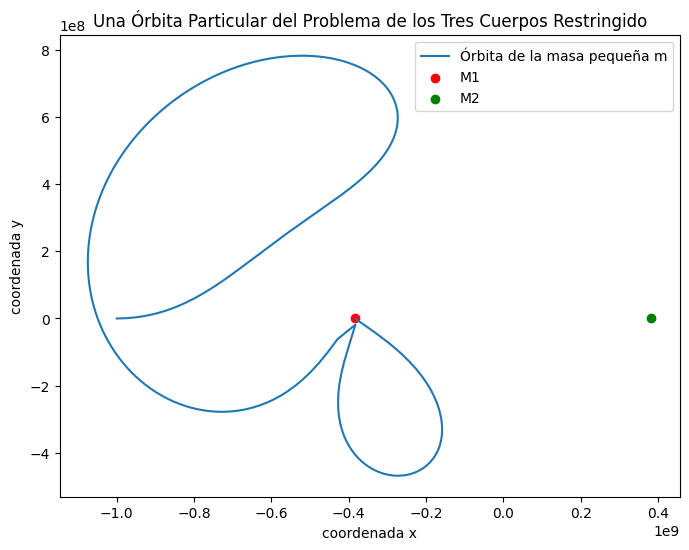

In [ ]:
'''En este código, se modela el sistema Tierra-Tierra-masita'''
'''Hay una colisión para cierto tiempo t.'''


import numpy as np
import matplotlib.pyplot as plt
import math
from scipy.integrate import solve_ivp

# Define the restricted three-body problem equations
def restricted_three_body(t, u):
    x, y, vx, vy = u
    r1 = np.sqrt((x - x1)**2 + y**2)
    r2 = np.sqrt((x - x2)**2 + y**2)
    ax = - 2 * w * vy + w**2 * x - (G * M1 * (x - x1)) / r1**3 - (G * M2 * (x - x2))/ r2**3
    ay = 2 * w * vx + w**2 * y - (G * M1 * y)/ r1**3 - (G * M2 * y)/ r2**3
    return [vx, vy, ax, ay]

# Define some constants
G = 6.672e-11
tau = 2*2360591.424 # El doble del periodo de la órbita Tierra-Luna en segundos (son 54 días)
w = 2*math.pi / tau

# Define the masses of the larger bodies
M1 = 5.972e24  # Mass of the first larger body
M2 = 5.972e24   # Mass of the second larger body

# Define the positions of the larger bodies
x1 = - (M2 / (M1 + M2)**(2/3)) * (G / w**2)**(1/3)
x2 = (M1 / (M1 + M2)**(2/3)) * (G / w**2)**(1/3)

# Define the initial conditions (position and velocity) of the small mass
x0 = -10e8   # Initial x-coordinate of the small mass
y0 = 0.0   # Initial y-coordinate of the small mass
vx0 = 0.97e3 # Initial x-velocity of the small mass
vy0 = 0.0  # Initial y-velocity of the small mass

# Set the time span for the simulation
t_span = (0, 40*tau)
t_eval = np.linspace(t_span[0], t_span[1], 10000)

# Solve the initial value problem using solve_ivp
sol = solve_ivp(restricted_three_body, t_span, [x0, y0, vx0, vy0], t_eval=t_eval, method='RK45')

# Extract the solution components
x_values, y_values = sol.y[0], sol.y[1]

# Plot the orbit of the small mass in 2D space
plt.figure(figsize=(8, 6))
plt.plot(x_values, y_values, label='Órbita de la masa pequeña m')
plt.scatter([x1], [0], color='red', marker='o', label='M1')
plt.scatter([x2], [0], color='green', marker='o', label='M2')
plt.xlabel('coordenada x')
plt.ylabel('coordenada y')
plt.title('Una Órbita Particular del Problema de los Tres Cuerpos Restringido')
plt.legend(loc='upper right')
plt.grid(False)
plt.show()

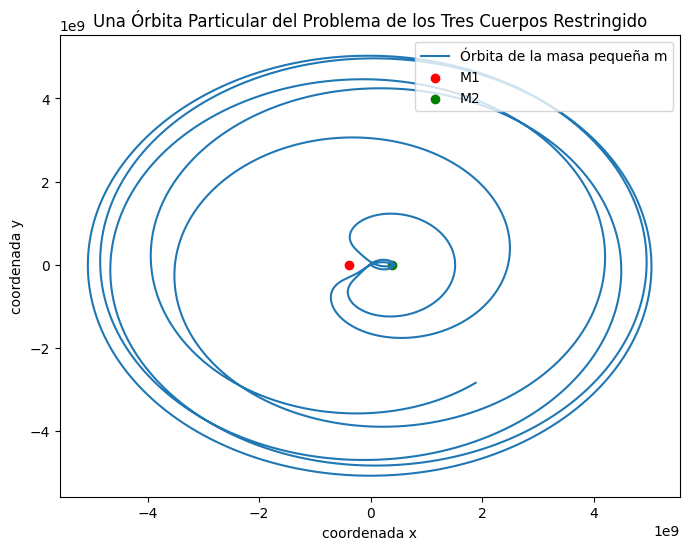

In [ ]:
'''En este código, se modela el sistema Tierra-Tierra-masita '''
'''La masa sale del diámetro que une a M1 y M2. Luego regresa devuelta.'''

import numpy as np
import matplotlib.pyplot as plt
import math
from scipy.integrate import solve_ivp

# Define the restricted three-body problem equations
def restricted_three_body(t, u):
    x, y, vx, vy = u
    r1 = np.sqrt((x - x1)**2 + y**2)
    r2 = np.sqrt((x - x2)**2 + y**2)
    ax = - 2 * w * vy + w**2 * x - (G * M1 * (x - x1)) / r1**3 - (G * M2 * (x - x2))/ r2**3
    ay = 2 * w * vx + w**2 * y - (G * M1 * y)/ r1**3 - (G * M2 * y)/ r2**3
    return [vx, vy, ax, ay]

# Define some constants
G = 6.672e-11
tau = 2*2360591.424 # El doble del periodo de la órbita Tierra-Luna en segundos (son 54 días)
w = 2*math.pi / tau

# Define the masses of the larger bodies
M1 = 5.972e24  # Mass of the first larger body
M2 = 5.972e24   # Mass of the second larger body

# Define the positions of the larger bodies
x1 = - (M2 / (M1 + M2)**(2/3)) * (G / w**2)**(1/3)
x2 = (M1 / (M1 + M2)**(2/3)) * (G / w**2)**(1/3)

# Define the initial conditions (position and velocity) of the small mass
x0 = 0.0e8   # Initial x-coordinate of the small mass
y0 = 0.0   # Initial y-coordinate of the small mass
vx0 = 1e3 # Initial x-velocity of the small mass
vy0 = -1e3  # Initial y-velocity of the small mass

# Set the time span for the simulation
t_span = (0, 7*tau)
t_eval = np.linspace(t_span[0], t_span[1], 10000)

# Solve the initial value problem using solve_ivp
sol = solve_ivp(restricted_three_body, t_span, [x0, y0, vx0, vy0], t_eval=t_eval, method='RK45')

# Extract the solution components
x_values, y_values = sol.y[0], sol.y[1]

# Plot the orbit of the small mass in 2D space
plt.figure(figsize=(8, 6))
plt.plot(x_values, y_values, label='Órbita de la masa pequeña m')
plt.scatter([x1], [0], color='red', marker='o', label='M1')
plt.scatter([x2], [0], color='green', marker='o', label='M2')
plt.xlabel('coordenada x')
plt.ylabel('coordenada y')
plt.title('Una Órbita Particular del Problema de los Tres Cuerpos Restringido')
plt.legend(loc='upper right')
plt.grid(False)
plt.show()